#### Author: Yash Shinge - IPNNL
#### Program assignment 6

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 6,6
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 13.0

pi = np.pi

#### Define order of the filter and cut off frequency

In [2]:
K = 4
cut_off = 1.2

#### Get coefficients of butterworth filter

In [3]:
a, b = signal.butter(K, cut_off, analog=True)

#### Continuous time transfer function (s domain)

In [4]:
Hs = signal.TransferFunction(a, b)

In [5]:
Hs

TransferFunctionContinuous(
array([2.0736]),
array([1.        , 3.13575112, 4.91646753, 4.51548161, 2.0736    ]),
dt: None
)

#### Converting to Z domain (Discrete time):


In [6]:
ts = 1 # Sampling period set to 1
Hz = signal.cont2discrete((Hs.num, Hs.den), ts, method='bilinear') #using bilinear transformation

#### Get coefficients from H(z)

In [7]:
az = Hz[0][0]
bz = Hz[1]

#### Generating  Amplitude response and corresponding frequency w


In [8]:
w, amp = signal.freqz(az, bz)

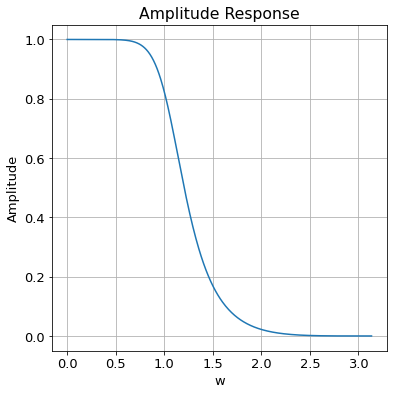

In [9]:
plt.plot(w, abs(amp))
plt.title('Amplitude Response')
plt.xlabel('w')
plt.ylabel('Amplitude')
plt.show()

----
## Pade's method to generate coefficients


#### Generating impulse response

In [10]:
t, h_  = signal.dimpulse((az, bz, ts), t=range(100))
h = h_[0].flatten()

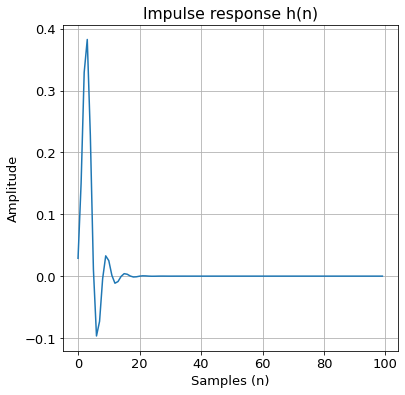

In [11]:
plt.plot(t, h)
plt.title('Impulse response h(n)')
plt.xlabel('Samples (n)')
plt.ylabel('Amplitude')
plt.show()

#### Function to perform pade calculations

In [12]:
def pade_method(h, K):
    
    A = np.zeros((2*K + 1, 2*K + 1), float)
    for i in range(K + 1):
        A[i][i] = 1

    for j in range(K+2, 2*K + 1+1):
        n = 0
        for i in range(j-K, 2*K+1+1):
            A[i-1][j-1] = -h[n]
            n += 1

    B = np.zeros((2*K + 1, ), float)
    for i in range(1, 2*K + 1 + 1):
        B[i-1] = h[i-1]

    X = np.linalg.solve(A, B)

    a1 = np.zeros((K+1, ), float)
    for i in range(1, K + 1 + 1):
        a1[i-1] = X[i-1]

        
    b1 = np.zeros((K+1, ), float)
    b1[0] = 1
    i = 1
    for j in range(K+2, 2*K + 1 + 1):
        b1[i] = X[j - 1]
        i += 1

    return a1, b1

#### Get coefficients from Pade method

In [13]:
a_pade, b_pade = pade_method(h, K)

In [14]:
w_pade, amp_pade = signal.freqz(a_pade, b_pade)

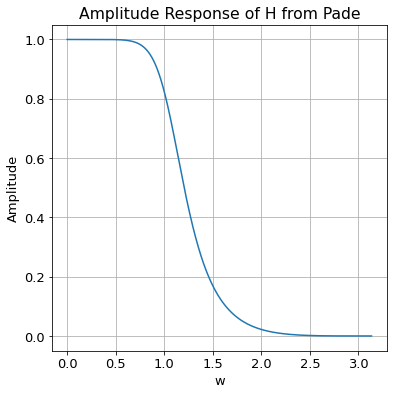

In [15]:
plt.plot(w_pade, abs(amp_pade))
plt.title('Amplitude Response of H from Pade')
plt.xlabel('w')
plt.ylabel('Amplitude')
plt.show()

#### Confirming the results:


In [16]:
print(f'az:     {az}')
print(f'a_pade: {a_pade}')

az:     [0.02885754 0.11543015 0.17314523 0.11543015 0.02885754]
a_pade: [0.02885754 0.11543015 0.17314523 0.11543015 0.02885754]


In [17]:
print(f'bz:     {bz}')
print(f'b_pade: {b_pade}')

bz:     [ 1.         -1.22209907  0.96177681 -0.32837012  0.05041299]
b_pade: [ 1.         -1.22209907  0.96177681 -0.32837012  0.05041299]
